In [87]:
# Pandas intro

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

In [88]:
import pandas as pd
import numpy as np

In [89]:
# Creating a Series
s = pd.Series([2, -3, 1, 5])
s

0    2
1   -3
2    1
3    5
dtype: int64

In [90]:
np.exp(s)

0      7.389056
1      0.049787
2      2.718282
3    148.413159
dtype: float64

In [91]:
s + [100,200,300,400]

0    102
1    197
2    301
3    405
dtype: int64

In [92]:
s + 100

0    102
1     97
2    101
3    105
dtype: int64

In [93]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. 

By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [94]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [95]:
s2["bob"]

83

In [96]:
s2[2]

112

loc:
To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [97]:
s2.loc["bob"]

83

In [98]:
s2.iloc[1]

83

In [99]:
s2.iloc[2:3] #No.2 is not included

charles    112
dtype: int64

In [100]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [101]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [102]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


In [103]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [104]:
weights = {"alice":68,"bob":83,"colin":86,"darwin":68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [105]:
# again:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [106]:
# s2 is equivalent to s3

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [107]:
s4 = pd.Series(weights,index=["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [108]:
print(s2.keys())
print(s3.keys())

s3 + s2

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [109]:
s5 = pd.Series([1000, 1000, 1000, 1000])

s5.values

array([1000, 1000, 1000, 1000])

In [110]:
s2.values

array([ 68,  83, 112,  68])

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [111]:
meaning = pd.Series(43,["life", "universe", "everything"])
meaning

life          43
universe      43
everything    43
dtype: int64

In [112]:
# Serise name
s6 = pd.Series([83, 68], index=["bob", "alice"], name= "weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

In [113]:
# plotting & series （not necessary)

<AxesSubplot:>

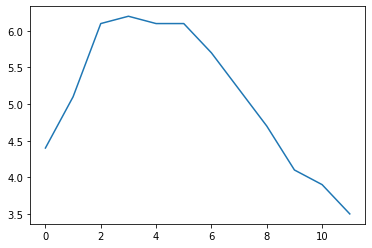

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt

temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name="temperature")
s7.plot()

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [115]:
dates = pd.date_range("2018/8/1 16:00" , periods=12,freq='H') # ,freq= T S M W,try
dates

DatetimeIndex(['2018-08-01 16:00:00', '2018-08-01 17:00:00',
               '2018-08-01 18:00:00', '2018-08-01 19:00:00',
               '2018-08-01 20:00:00', '2018-08-01 21:00:00',
               '2018-08-01 22:00:00', '2018-08-01 23:00:00',
               '2018-08-02 00:00:00', '2018-08-02 01:00:00',
               '2018-08-02 02:00:00', '2018-08-02 03:00:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [116]:
temp_series = pd.Series(temperatures,dates)
temp_series

2018-08-01 16:00:00    4.4
2018-08-01 17:00:00    5.1
2018-08-01 18:00:00    6.1
2018-08-01 19:00:00    6.2
2018-08-01 20:00:00    6.1
2018-08-01 21:00:00    6.1
2018-08-01 22:00:00    5.7
2018-08-01 23:00:00    5.2
2018-08-02 00:00:00    4.7
2018-08-02 01:00:00    4.1
2018-08-02 02:00:00    3.9
2018-08-02 03:00:00    3.5
Freq: H, dtype: float64

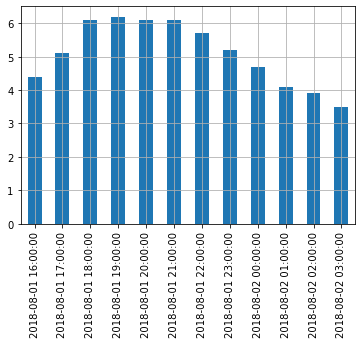

In [117]:
# plot the Series
temp_series.plot(kind="bar")

plt.grid(True) #no more plt.show()

In [118]:
# Now we can rethink the seires meaning, it's inclusive and usefull, you can combine various arrays

<AxesSubplot:>

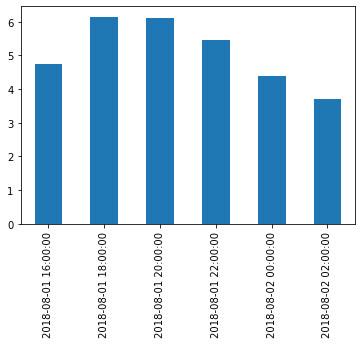

In [119]:
# Resampling
temp_series_freq_2H = temp_series.resample("2H") #0.5H 1.5H 2H 3H 5H
temp_series_freq_2H = temp_series_freq_2H.mean() # slice sampling
temp_series_freq_2H.plot(kind="bar")

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [120]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2018-08-01 16:00:00    4.4
2018-08-01 18:00:00    6.1
2018-08-01 20:00:00    6.1
2018-08-01 22:00:00    5.2
2018-08-02 00:00:00    4.1
2018-08-02 02:00:00    3.5
Freq: 2H, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [121]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2018-08-01 16:00:00    4.4
2018-08-01 18:00:00    6.1
2018-08-01 20:00:00    6.1
2018-08-01 22:00:00    5.2
2018-08-02 00:00:00    4.1
2018-08-02 02:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [122]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values,everytime begin with the initial value

2018-08-01 16:00:00    4.4
2018-08-01 16:15:00    NaN
2018-08-01 16:30:00    NaN
2018-08-01 16:45:00    NaN
2018-08-01 17:00:00    5.1
2018-08-01 17:15:00    NaN
2018-08-01 17:30:00    NaN
2018-08-01 17:45:00    NaN
2018-08-01 18:00:00    6.1
2018-08-01 18:15:00    NaN
Freq: 15T, dtype: float64

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [123]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(
    method="cubic")
temp_series_freq_15min.head(n=10)

2018-08-01 16:00:00    4.400000
2018-08-01 16:15:00    4.452911
2018-08-01 16:30:00    4.605113
2018-08-01 16:45:00    4.829758
2018-08-01 17:00:00    5.100000
2018-08-01 17:15:00    5.388992
2018-08-01 17:30:00    5.669887
2018-08-01 17:45:00    5.915839
2018-08-01 18:00:00    6.100000
2018-08-01 18:15:00    6.203621
Freq: 15T, dtype: float64

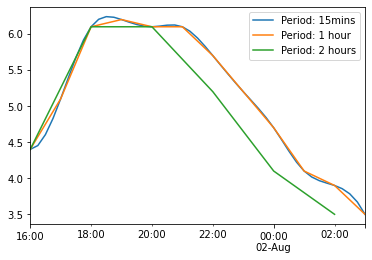

In [124]:
temp_series_freq_15min.plot(label="Period: 15mins")
temp_series.plot(label="Period: 1 hour")
temp_series_freq_2H.plot(label="Period: 2 hours")

plt.legend()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2018-08-01 02:30 might mean August 1st 2018 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [125]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2018-08-01 16:00:00-04:00    4.4
2018-08-01 17:00:00-04:00    5.1
2018-08-01 18:00:00-04:00    6.1
2018-08-01 19:00:00-04:00    6.2
2018-08-01 20:00:00-04:00    6.1
2018-08-01 21:00:00-04:00    6.1
2018-08-01 22:00:00-04:00    5.7
2018-08-01 23:00:00-04:00    5.2
2018-08-02 00:00:00-04:00    4.7
2018-08-02 01:00:00-04:00    4.1
2018-08-02 02:00:00-04:00    3.9
2018-08-02 03:00:00-04:00    3.5
dtype: float64

In [126]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2018-08-01 22:00:00+02:00    4.4
2018-08-01 23:00:00+02:00    5.1
2018-08-02 00:00:00+02:00    6.1
2018-08-02 01:00:00+02:00    6.2
2018-08-02 02:00:00+02:00    6.1
2018-08-02 03:00:00+02:00    6.1
2018-08-02 04:00:00+02:00    5.7
2018-08-02 05:00:00+02:00    5.2
2018-08-02 06:00:00+02:00    4.7
2018-08-02 07:00:00+02:00    4.1
2018-08-02 08:00:00+02:00    3.9
2018-08-02 09:00:00+02:00    3.5
dtype: float64

In [127]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2018-08-01 22:00:00    4.4
2018-08-01 23:00:00    5.1
2018-08-02 00:00:00    6.1
2018-08-02 01:00:00    6.2
2018-08-02 02:00:00    6.1
2018-08-02 03:00:00    6.1
2018-08-02 04:00:00    5.7
2018-08-02 05:00:00    5.2
2018-08-02 06:00:00    4.7
2018-08-02 07:00:00    4.1
2018-08-02 08:00:00    3.9
2018-08-02 09:00:00    3.5
dtype: float64

In [128]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [129]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2018-08-01 22:00:00+02:00    4.4
2018-08-01 23:00:00+02:00    5.1
2018-08-02 00:00:00+02:00    6.1
2018-08-02 01:00:00+02:00    6.2
2018-08-02 02:00:00+02:00    6.1
2018-08-02 03:00:00+02:00    6.1
2018-08-02 04:00:00+02:00    5.7
2018-08-02 05:00:00+02:00    5.2
2018-08-02 06:00:00+02:00    4.7
2018-08-02 07:00:00+02:00    4.1
2018-08-02 08:00:00+02:00    3.9
2018-08-02 09:00:00+02:00    3.5
dtype: float64

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [164]:
quarters = pd.period_range("2016-9", periods=8,freq='q') # the format is easy to be recognized
quarters

PeriodIndex(['2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
             '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [165]:
quarters + 3

PeriodIndex(['2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3',
             '2018Q4', '2019Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [166]:
quarters.asfreq("M")

PeriodIndex(['2016-09', '2016-12', '2017-03', '2017-06', '2017-09', '2017-12',
             '2018-03', '2018-06'],
            dtype='period[M]', freq='M')

By default, the `asfreq` zooms on the end of each period. We can tell it to zoom on the start of each period instead:

In [167]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10',
             '2018-01', '2018-04'],
            dtype='period[M]', freq='M')

In [168]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2017', '2017', '2017', '2017', '2018', '2018'], dtype='period[A-DEC]', freq='A-DEC')

Of course we can create a `Series` with a `PeriodIndex`:

In [169]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410],
                              index=quarters)
quarterly_revenue   

2016Q3    300
2016Q4    320
2017Q1    290
2017Q2    390
2017Q3    320
2017Q4    360
2018Q1    310
2018Q2    410
Freq: Q-DEC, dtype: int64

<AxesSubplot:>

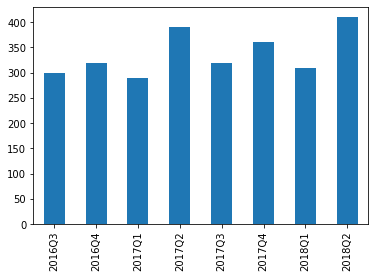

In [170]:
quarterly_revenue.plot(kind="bar") # line bar 

In [171]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-09-30 23:59:59.999999999    300
2016-12-31 23:59:59.999999999    320
2017-03-31 23:59:59.999999999    290
2017-06-30 23:59:59.999999999    390
2017-09-30 23:59:59.999999999    320
2017-12-31 23:59:59.999999999    360
2018-03-31 23:59:59.999999999    310
2018-06-30 23:59:59.999999999    410
dtype: int64

In [172]:
last_hours.to_period()

2016Q3    300
2016Q4    320
2017Q1    290
2017Q2    390
2017Q3    320
2017Q4    360
2018Q1    310
2018Q2    410
Freq: Q-DEC, dtype: int64

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [173]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

## dataframe objects

A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [174]:
people_dict ={ 
    "weight":
    pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear":
    pd.Series([1984, 1985, 1992],
                index=["bob", "alice", "charles"],
                name="year"),
    "children":
    pd.Series([0, 3], index=["charles", "bob"]),
    "hobby":
    pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN
